In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
training = pd.read_csv('train.csv')

In [81]:
training.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [82]:
training['previous_year_rating'].where(training['department'] == 'R&D').mean()

3.56359649122807

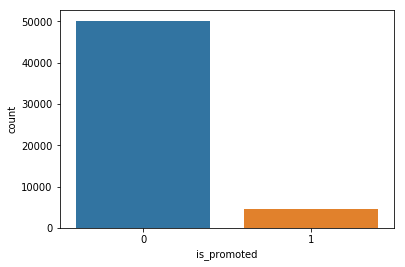

In [83]:
sns.countplot(training['is_promoted'])

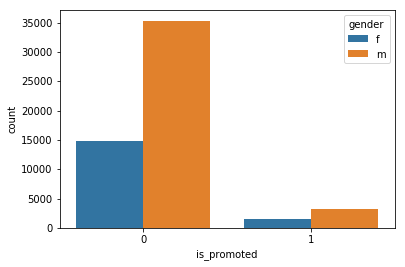

In [84]:
sns.countplot(training['is_promoted'],hue = training['gender'])

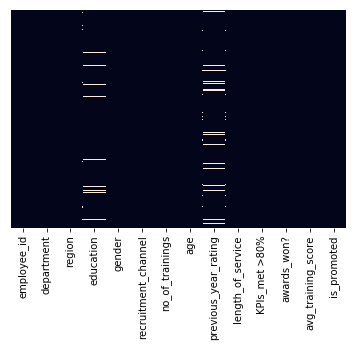

In [85]:
sns.heatmap(training.isna(),yticklabels=False,cbar=False)

In [86]:
training['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [93]:
'''def educ(colums):
    gender = colums[0]
    education = colums[1]
    channel = colums[2]
    age = colums[3]
    if pd.isnull(education):
        if(gender == 'm' and channel == 'sourcing'):
            return('Master\'s & above')
        elif(gender == 'f' and channel == 'sourcing'):
            return('Bachelor\'s')
        elif(gender == 'm' and channel == 'other' and age <= 40 ):
            return('Bachelor\'s')
        elif(gender == 'm' and channel == 'other' and age > 40):
            return('Master\'s & above')
        elif(gender == 'f' and channel == 'other' and age <= 38):
            return('Bachelor\'s')
        elif(gender == 'f' and channel == 'other' and age > 38):
            return('Master\'s & above')
        else:
            return('Bachelor\'s')
    else:
        return(education)'''

training['education'].fillna('Bachelor\'s',inplace = True)

In [94]:
'''training['education'] = training[['gender','education','recruitment_channel','age']].apply(educ,axis = 1)'''

"training['education'] = training[['gender','education','recruitment_channel','age']].apply(educ,axis = 1)"

In [95]:
def rating(columns):
    tech = columns[0]
    rating = columns[1]
    if pd.isnull(rating):
        if(tech == 'Technology'):
            return(3)
        elif(tech == 'Sales & Marketing'):
            return(3)
        elif(tech == 'Operations'):
            return(4)
        elif(tech == 'R&D'):
            return(4)
        else:
            return(3)
    else:
        return(rating)

In [96]:
training['previous_year_rating'] = training[['department','previous_year_rating']].apply(rating,axis = 1)

In [97]:
#training['previous_year_rating'].fillna(1,inplace = True)

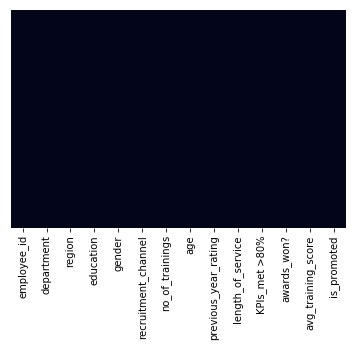

In [98]:
sns.heatmap(training.isna(),yticklabels=False,cbar = False)

In [99]:
Department = pd.get_dummies(training['department'])

In [100]:
#training['region'].unique()

In [101]:
#Region = dict(zip(training['region'].unique(),range(1,len(training['region']) + 1)))

In [102]:
rg = pd.get_dummies(training['region'])

In [103]:
#training['region'] = training['region'].map(Region)

In [104]:
training['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [105]:
Education = pd.get_dummies(training['education'])

In [106]:
Gender = pd.get_dummies(training['gender'],drop_first=True)

In [107]:
Channel = pd.get_dummies(training['recruitment_channel'])

In [108]:
training = pd.concat([training,Department,Education,Gender,Channel,rg],axis=1)

In [109]:
training.drop(['gender','department','education','recruitment_channel','region'],inplace=True,axis=1)

In [110]:
training.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Analytics,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
y = training['is_promoted']
x = training.drop(['is_promoted'],axis=1)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size = 0.6,random_state = 101)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logit = LogisticRegression()

In [116]:
logit.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
predictions = logit.predict(x_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [119]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     30136
          1       0.00      0.00      0.00      2749

avg / total       0.84      0.92      0.88     32885

[[30136     0]
 [ 2749     0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc = DecisionTreeClassifier()

In [122]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
print(classification_report(y_test,dtc.predict(x_test)))
print(confusion_matrix(y_test,dtc.predict(x_test)))
print(accuracy_score(y_test,dtc.predict(x_test)))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94     30136
          1       0.40      0.45      0.42      2749

avg / total       0.90      0.90      0.90     32885

[[28268  1868]
 [ 1515  1234]]
0.8971263493994223


In [937]:
from sklearn.neighbors import KNeighborsClassifier

In [938]:
knn = KNeighborsClassifier(n_neighbors=100)

In [939]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [940]:
print(accuracy_score(y_test,knn.predict(x_test)))
print(classification_report(y_test,knn.predict(x_test)))

0.916405656074198
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     30136
          1       0.00      0.00      0.00      2749

avg / total       0.84      0.92      0.88     32885



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [879]:
best = 0
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    p = accuracy_score(y_test,knn.predict(x_test))
    if(p > best):
        best = p
        j = i

In [880]:
j

12

In [874]:
best

0.9158582940550403

In [941]:
from sklearn.ensemble import RandomForestClassifier

In [942]:
rfc = RandomForestClassifier(n_estimators=19)

In [943]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [944]:
print(accuracy_score(y_test,rfc.predict(x_test)))

0.93185342861487


In [590]:
b = 0
for i in range (1,300):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,Y_train)
    pr = accuracy_score(y_test,rfc.predict(x_test))
    if pr > b:
        b = pr
        j = i

In [591]:
j

19

In [592]:
pr

0.9331306066595713

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC()

In [45]:
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
p = svc.predict(x_test)

In [47]:
print(accuracy_score(y_test,p))

0.9161927930667477


In [48]:
print(classification_report(y_test,p))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     30136
          1       0.00      0.00      0.00      2749

avg / total       0.84      0.92      0.88     32885



In [49]:
print(confusion_matrix(y_test,p))

[[30129     7]
 [ 2749     0]]
